#2.- Busca en internet un csv que contenga entre 20 y 30 columnas. Trata el csv para que todas las columnas sean numéricas. Normaliza los datos y aplícale el algoritmo PCA y el algoritmo TSNE por separado. El objetivo es obtener un dataframe con 3 ó 4 columnas representativo del inicial.

In [1]:
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df=pd.read_csv("automobile.csv")
columnas_inicio=len(df.columns)
print(F"El dataframe original cuenta con {columnas_inicio} columnas")

El dataframe original cuenta con 26 columnas


In [3]:
df.dropna(inplace=True)
df.shape

(164, 26)

Pasar todas las columnas objeto a numéricas

In [4]:
obj_cols = df.select_dtypes(include="object").columns
for col in obj_cols:
  df[col] = pd.Categorical(df[col])

cat_cols = df.select_dtypes(include="category").columns
for col in cat_cols:
  df[col] = df[col].cat.codes

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,0,1,0,0,3,1,0,99.8,...,109,5,12,20,10.0,2,15,24,30,13950
4,2,164.0,0,1,0,0,3,0,0,99.4,...,136,5,12,20,8.0,8,15,18,22,17450
6,1,158.0,0,1,0,0,3,1,0,105.8,...,136,5,12,20,8.5,4,15,19,25,17710
8,1,158.0,0,1,1,0,3,1,0,105.8,...,131,5,9,20,8.3,15,15,17,20,23875
9,2,192.0,1,1,0,1,3,2,0,101.2,...,108,5,22,4,8.8,1,17,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,17,1,1,0,3,2,0,109.1,...,141,5,31,11,8.7,22,13,19,25,19045
198,-1,95.0,17,1,0,0,3,2,0,109.1,...,173,5,24,5,8.8,13,15,18,23,21485
199,-1,95.0,17,0,1,0,3,2,0,109.1,...,145,3,5,20,23.0,3,7,26,27,22470
200,-1,95.0,17,1,1,0,3,2,0,109.1,...,141,5,31,11,9.5,7,14,19,25,22625


Para este conjunto de datos voy a escoger "price" para la target (Y), ya que es el resultado de todas las demás columnas.

In [5]:
X=df.drop(columns="price")
Y=df["price"]
X.shape

(164, 25)

Partimos de 25 columnas en X

Lo primero es normalizar

In [6]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

#PCA

In [7]:
pca = PCA()
pca.fit(X1)

PCA()

Vamos a representar la varianza explicada para ver a partir de qué número de componentes principales obtenemos un 90% de la proporción

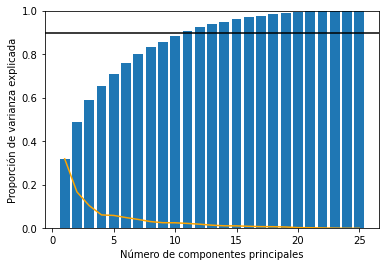

In [8]:
plt.plot(range(1,26), pca.explained_variance_ratio_, c="orange")
plt.bar(range(1, 26), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(u"Número de componentes principales")
plt.ylabel(u"Proporción de varianza explicada")
plt.ylim(0, 1)
plt.axhline(0.90, c="black")
plt.show()

El primer número en pasar la línea del 90% es 11, así que voy a ajustar el modelo con ese número de componentes



In [9]:
pca = PCA(n_components=11)
pca.fit(X1)
comp_principales = pca.transform(X1)
comp_principales.shape

(164, 11)

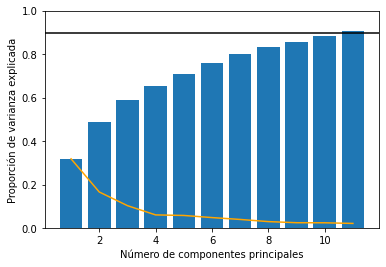

In [10]:
plt.plot(range(1,12), pca.explained_variance_ratio_, c="orange")
plt.bar(range(1, 12), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(u"Número de componentes principales")
plt.ylabel(u"Proporción de varianza explicada")
plt.ylim(0, 1)
plt.axhline(0.90, c="black")
plt.show()

Ahora que la gráfica se puede leer con mayor facilidad, vemos que la proporción de la varianza tiene un pico de descenso menor a partir de los 4 componentes principales, esto quiere decir que a partir de 4 componentes se va a incluir una parte de la varianza menos significante, lo cual es conveniente para el ejericicio ya que se pide reducir el conjunto de datos a 3 o 4 columnas.

Aún así vamos a ver cuál es la proporción de la varianza con 4 componentes para ver si estamos tomando la decisión correcta.


In [11]:
varianza_4=round(pca.explained_variance_ratio_[:4].cumsum()[3],4)*100
varianza_4

65.23

Como podemos ver, si recortamos el conjunto de datos a 4 componentes principales retendremos tan sólo un **65%** de la varianza original.

#TSNE

Ahora vamos a reducir la dimensionalidad del conjunto de datos por segunda vez, esta vez con el algoritmo TSNE, vamos a establecer los hiperparámetros 'n_components' a 4 según las estimaciones anteriores, y 'method' a "exact", para que se pueda realizar esta reducción de dimensiones, ya que el algoritmo barnes_hut utilizado por defecto no soporta más de 3 dimensiones.

In [12]:
tsne = TSNE(n_components=4, learning_rate='auto' ,init='random',method='exact')
X_final=tsne.fit_transform(X1)

In [13]:
X_final.shape

(164, 4)

# CONCLUSIÓN

Hemos pasado de tener un conjunto de datos con 25 columnas a tener otro conjunto de datos con 4 columnas y reteniendo el 65% de la varianza.

Desde mi punto de vista, lo siguiente será sopesar si nos merece la pena utilizar este conjunto de datos con un modelo costoso en el que se note la reducción de dimensiones, o utilizar otro modelo más simple que nos pueda dar predicciones sobre el conjunto de datos completo.